# Imports

In [38]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
!ls

ML.ipynb              metadata.csv          results_no_cc.csv
Multiple Models.ipynb plot.ipynb            test_data.csv
metadata-v0.csv       results_after_cc.csv


## Load datasets

In [40]:
cols = ['filename', 'R', 'G', 'B']
col_names = {'filename': 'filename', 'R': 'R_corrected', 'G': 'G_corrected', 'B': 'B_corrected'} 
df_color_corrected = pd.read_csv("results_after_cc.csv", usecols=cols).rename(columns=col_names)
df_color_corrected.head()

filename  R_corrected  G_corrected  B_corrected
0   SP2-B201-G-H6.jpg   172.361810   165.366335   133.213213
1   SP2-B201-G-H7.jpg   212.727602   210.037285   188.344796
2  SP2-B201-G-H20.jpg   169.052670   163.957104   140.482534
3   SP2-B201-G-H5.jpg   238.161991   239.019910   233.287421
4   SP2-B201-G-H4.jpg   234.089231   231.791493   221.808869

In [4]:
cols = ['filename', 'R', 'G', 'B']
col_names = {'filename': 'filename', 'R': 'R_no_correction', 'G': 'G_no_correction', 'B': 'B_no_correction'} 
df_original_color = pd.read_csv("results_no_cc.csv", usecols=cols).rename(columns=col_names)
df_original_color.head()

filename  R_no_correction  G_no_correction  B_no_correction
0   SP2-B201-G-H6.jpg       126.977195       114.920362        95.391674
1   SP2-B201-G-H7.jpg       165.382443       156.603620       141.045068
2  SP2-B201-G-H20.jpg       124.603258       112.817376        94.406516
3   SP2-B201-G-H5.jpg       192.072217       186.942805       180.240905
4   SP2-B201-G-H4.jpg       185.206516       178.204163       168.906606

In [5]:
df_all_colors = pd.merge(df_color_corrected, df_original_color, on="filename")
df_all_colors.head()

filename  R_corrected  G_corrected  B_corrected  R_no_correction  \
0   SP2-B201-G-H6.jpg   172.361810   165.366335   133.213213       126.977195   
1   SP2-B201-G-H7.jpg   212.727602   210.037285   188.344796       165.382443   
2  SP2-B201-G-H20.jpg   169.052670   163.957104   140.482534       124.603258   
3   SP2-B201-G-H5.jpg   238.161991   239.019910   233.287421       192.072217   
4   SP2-B201-G-H4.jpg   234.089231   231.791493   221.808869       185.206516   

   G_no_correction  B_no_correction  
0       114.920362        95.391674  
1       156.603620       141.045068  
2       112.817376        94.406516  
3       186.942805       180.240905  
4       178.204163       168.906606

In [6]:
df_metadata = pd.read_csv("metadata.csv")
df_metadata.sample(5)

filename     BC
44   SP2-B201-G-L8.jpg  4.538
16  SP2-B201-G-H18.jpg  3.628
40   SP2-B201-G-L4.jpg  0.464
5     SP1-B201-G-6.jpg  5.675
45   SP2-B201-G-L9.jpg  2.165

In [7]:
df_all_colors_with_bc = pd.merge(df_all_colors, df_metadata, on=["filename"])
df_all_colors_with_bc.head()

filename  R_corrected  G_corrected  B_corrected  R_no_correction  \
0   SP2-B201-G-H6.jpg   172.361810   165.366335   133.213213       126.977195   
1   SP2-B201-G-H7.jpg   212.727602   210.037285   188.344796       165.382443   
2  SP2-B201-G-H20.jpg   169.052670   163.957104   140.482534       124.603258   
3   SP2-B201-G-H5.jpg   238.161991   239.019910   233.287421       192.072217   
4   SP2-B201-G-H4.jpg   234.089231   231.791493   221.808869       185.206516   

   G_no_correction  B_no_correction     BC  
0       114.920362        95.391674  7.801  
1       156.603620       141.045068  2.847  
2       112.817376        94.406516  7.294  
3       186.942805       180.240905  0.928  
4       178.204163       168.906606  1.335

# EDA

In [8]:
# !pip install "pandas-profiling[notebook]"

In [9]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_all_colors_with_bc, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Extract R, G, B values as X,  and BC values as y

In [10]:
X, y = df_all_colors_with_bc.iloc[:,1:-1], df_all_colors_with_bc.iloc[:,-1]

X.head(), y.head()

(   R_corrected  G_corrected  B_corrected  R_no_correction  G_no_correction  \
 0   172.361810   165.366335   133.213213       126.977195       114.920362   
 1   212.727602   210.037285   188.344796       165.382443       156.603620   
 2   169.052670   163.957104   140.482534       124.603258       112.817376   
 3   238.161991   239.019910   233.287421       192.072217       186.942805   
 4   234.089231   231.791493   221.808869       185.206516       178.204163   
 
    B_no_correction  
 0        95.391674  
 1       141.045068  
 2        94.406516  
 3       180.240905  
 4       168.906606  ,
 0    7.801
 1    2.847
 2    7.294
 3    0.928
 4    1.335
 Name: BC, dtype: float64)

In [11]:
X_after_cc, y_after_cc = df_all_colors_with_bc.iloc[:,1:4], df_all_colors_with_bc.iloc[:,-1]
X_after_cc.head(), y_after_cc.head()

(   R_corrected  G_corrected  B_corrected
 0   172.361810   165.366335   133.213213
 1   212.727602   210.037285   188.344796
 2   169.052670   163.957104   140.482534
 3   238.161991   239.019910   233.287421
 4   234.089231   231.791493   221.808869,
 0    7.801
 1    2.847
 2    7.294
 3    0.928
 4    1.335
 Name: BC, dtype: float64)

In [12]:
X_no_cc, y_no_cc = df_all_colors_with_bc.iloc[:,4:-1], df_all_colors_with_bc.iloc[:,-1]
X_no_cc.head(), y_no_cc.head()

(   R_no_correction  G_no_correction  B_no_correction
 0       126.977195       114.920362        95.391674
 1       165.382443       156.603620       141.045068
 2       124.603258       112.817376        94.406516
 3       192.072217       186.942805       180.240905
 4       185.206516       178.204163       168.906606,
 0    7.801
 1    2.847
 2    7.294
 3    0.928
 4    1.335
 Name: BC, dtype: float64)

## ML with Scikit-Learn

In [13]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # true, pred

In [14]:
random_state = 66

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
X_train_after_cc, X_test_after_cc, y_train_after_cc, y_test_after_cc = train_test_split(X_after_cc, y_after_cc, random_state=random_state)
X_train_no_cc, X_test_no_cc, y_train_no_cc, y_test_no_cc = train_test_split(X_no_cc, y_no_cc, random_state=random_state)

# datasets = [X_train, X_test, X_train_after_cc, X_test_after_cc]
# for dataset in datasets:
#     dataset.sort_values(by=['R_corrected'], inplace=True)

print("Train size: ", len(X_train), "\nTest size: ", len(X_test))

Train size:  33 
Test size:  12


## Create Ensemble Model

In [15]:
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor

scoring = ("r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error")

gb = GradientBoostingRegressor(random_state=1, n_estimators=100, learning_rate=0.1, max_depth=1)
rf = RandomForestRegressor(random_state=1, n_estimators=10, max_features=1, max_leaf_nodes=5)
lr = LinearRegression()
ridge = RidgeCV()
svr = SVR()

regressors = VotingRegressor(estimators=[\
    ('gb', gb), \
    ('rf', rf), \
    ('lr', lr), \
    ('ridge', ridge), \
    ('svm', svr)\
  ])

model = make_pipeline(StandardScaler(), regressors)
# model = make_pipeline(MinMaxScaler(), regressors)
# model = make_pipeline(Normalizer(), regressors)

In [16]:
cross_validate(model, X_train, y_train, cv=4, scoring=scoring)

{'fit_time': array([0.95135784, 0.04197192, 0.0408659 , 0.05951476]),
 'score_time': array([0.00432587, 0.00435495, 0.01776195, 0.02499008]),
 'test_r2': array([0.95741237, 0.93872175, 0.57893504, 0.85448134]),
 'test_neg_mean_absolute_error': array([-0.25970647, -0.60884815, -1.9166375 , -0.54628333]),
 'test_neg_mean_squared_error': array([ -0.1650188 ,  -0.67940561, -10.22017156,  -0.59673689]),
 'test_neg_root_mean_squared_error': array([-0.40622507, -0.82426064, -3.19690031, -0.77248747])}

In [17]:
cross_validate(model, X_train_after_cc, y_train_after_cc, cv=4, scoring=scoring)

{'fit_time': array([0.05234194, 0.04884791, 0.03764582, 0.08075786]),
 'score_time': array([0.00416112, 0.00371194, 0.00475335, 0.00516725]),
 'test_r2': array([0.96889105, 0.9027271 , 0.58304134, 0.89143543]),
 'test_neg_mean_absolute_error': array([-0.2668414 , -0.7155988 , -1.89656778, -0.4962937 ]),
 'test_neg_mean_squared_error': array([ -0.12054115,  -1.07848631, -10.12050278,  -0.4451971 ]),
 'test_neg_root_mean_squared_error': array([-0.34719036, -1.03850195, -3.18127377, -0.66723092])}

In [18]:
cross_validate(model, X_train_no_cc, y_train_no_cc, cv=4, scoring=scoring)

{'fit_time': array([0.03770709, 0.03723907, 0.03377318, 0.04230309]),
 'score_time': array([0.00414491, 0.00444293, 0.0037539 , 0.00422096]),
 'test_r2': array([0.95789495, 0.9553446 , 0.57865011, 0.87210794]),
 'test_neg_mean_absolute_error': array([-0.23070398, -0.49433137, -1.90526914, -0.43735904]),
 'test_neg_mean_squared_error': array([ -0.1631489 ,  -0.49510434, -10.22708759,  -0.52445443]),
 'test_neg_root_mean_squared_error': array([-0.40391694, -0.70363651, -3.1979818 , -0.72419226])}

In [19]:
# Use R channel
cross_validate(model, X_train_after_cc.iloc[:, 0].values.reshape(-1, 1), y_train_after_cc, cv=4, scoring=scoring)

{'fit_time': array([0.03562284, 0.03087306, 0.04323101, 0.02784991]),
 'score_time': array([0.00279403, 0.00286293, 0.00278592, 0.00227714]),
 'test_r2': array([0.96708289, 0.906748  , 0.57541085, 0.9114948 ]),
 'test_neg_mean_absolute_error': array([-0.26472447, -0.71996633, -1.94218358, -0.32692517]),
 'test_neg_mean_squared_error': array([ -0.12754739,  -1.0339057 , -10.30571155,  -0.36293844]),
 'test_neg_root_mean_squared_error': array([-0.35713777, -1.01681153, -3.21025101, -0.60244372])}

## Check R2 score after cross-validation

In [20]:
cross_val_score(model, X_train, y_train, cv=4)

array([0.95741237, 0.93872175, 0.57893504, 0.85448134])

## Fit Model

In [21]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae, mse, r2 = mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

print("MAE: ", mae, "\nMSE: ", mse, "\n R2: ", r2, "\nPredictions: ", y_pred)

MAE:  0.6569149905586745 
MSE:  0.7232649433578752 
 R2:  0.90483465782506 
Predictions:  [ 7.02520916  2.65318112  1.1663052   4.22821321  7.22640231  6.84764282
  3.51634847 10.22407264  0.77823266  5.23237971  4.22454955  5.34739802]


## Hyperparameter tuning

In [22]:
# params = {"param": np.arange(1,3), "kernel": ["linear", "rbf"]}

# grid = GridSearchCV(estimator=model, param_grid=params)
# grid.fit(X_train, y_train)

# print(grid.best_score_)
# print(grid.best_estimator_)

### Test Model on new images

In [23]:
df_test = pd.read_csv("test_data.csv")
df_test

filename           R           G           B    BC
0    RCV1.2.4_P1_36h_r.jpg  227.735743  226.151449  214.286382  1.50
1    RCV1.2.4_P1_24h_r.jpg  215.259034  212.563034  198.467034  2.09
2    RCV1.2.4_P1_12h_r.jpg  243.208788  245.875039  244.318168  0.50
3  RCV1.2.4_P1_blank_r.jpg  243.457152  248.335619  246.678716  0.00
4    RCV1.2.4_P1_60h_r.jpg  166.565793  162.700414  138.765517  5.68
5    RCV1.2.4_P1_72h_r.jpg  221.807568  219.919918  206.118803  1.73
6    RCV1.2.4_P1_48h_r.jpg  203.683862  199.410483  179.163310  2.35
7     RCV1.2.4_P1_6h_r.jpg  248.933241  224.825379  168.017655  0.16

In [24]:
X_test_new = df_test[["R", "G", "B"]]
X_test_new

R           G           B
0  227.735743  226.151449  214.286382
1  215.259034  212.563034  198.467034
2  243.208788  245.875039  244.318168
3  243.457152  248.335619  246.678716
4  166.565793  162.700414  138.765517
5  221.807568  219.919918  206.118803
6  203.683862  199.410483  179.163310
7  248.933241  224.825379  168.017655

In [25]:
model.fit(X_train_after_cc.iloc[:, 0].values.reshape(-1, 1), y_train_after_cc)
df_test["BC_pred"] = model.predict(X_test_new.iloc[:,0].values.reshape(-1, 1))
df_test

filename           R           G           B    BC   BC_pred
0    RCV1.2.4_P1_36h_r.jpg  227.735743  226.151449  214.286382  1.50  1.555417
1    RCV1.2.4_P1_24h_r.jpg  215.259034  212.563034  198.467034  2.09  2.368608
2    RCV1.2.4_P1_12h_r.jpg  243.208788  245.875039  244.318168  0.50  0.435845
3  RCV1.2.4_P1_blank_r.jpg  243.457152  248.335619  246.678716  0.00  0.425314
4    RCV1.2.4_P1_60h_r.jpg  166.565793  162.700414  138.765517  5.68  7.795252
5    RCV1.2.4_P1_72h_r.jpg  221.807568  219.919918  206.118803  1.73  1.911007
6    RCV1.2.4_P1_48h_r.jpg  203.683862  199.410483  179.163310  2.35  4.027588
7     RCV1.2.4_P1_6h_r.jpg  248.933241  224.825379  168.017655  0.16  0.161460

In [26]:
y_test, y_pred = df_test['BC'], df_test['BC_pred']
mae, mse, r2 = mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

print("MAE: ", mae, "\nMSE: ", mse, "\nR2: ", r2, sep="")

MAE: 0.5998502808754165
MSE: 0.9483827619457011
R2: 0.6720737278912536


## Using Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2, include_bias=False)

R = X_train_after_cc.iloc[:, 0].values.reshape(-1, 1)

poly_train_features = poly.fit_transform(R)
poly_test_features = poly.fit_transform(X_test_after_cc.iloc[:, 0].values.reshape(-1, 1))

poly_train_features, poly_test_features

(array([[  189.06171946, 35744.33376404],
        [  224.1399095 , 50238.69903168],
        [  205.53954751, 42246.50559115],
        [  230.85339367, 53293.28936672],
        [  238.16199095, 56721.13393338],
        [  222.95131222, 49707.28761937],
        [  220.44742081, 48597.06534376],
        [  170.90171946, 29207.39771336],
        [  232.9800905 , 54279.72256833],
        [  222.95221719, 49707.69115197],
        [  202.04542986, 40822.35572903],
        [  243.82352941, 59449.91349481],
        [  145.15837104, 21070.9526832 ],
        [  176.40832579, 31119.89740869],
        [  169.05266968, 28578.80512704],
        [  153.75837104, 23641.6366651 ],
        [  226.87004525, 51470.01743122],
        [  172.36180995, 29708.59353088],
        [  194.94533937, 38003.68534073],
        [  200.28886878, 40115.63095648],
        [  164.11728507, 26934.48325805],
        [  216.78552036, 46995.96183862],
        [  130.19800905, 16951.52156052],
        [  205.80126697, 42354.161

In [28]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_train_features, y_train_after_cc)

LinearRegression()

In [29]:
y_pred = poly_reg_model.predict(poly_train_features)
y_pred

array([ 4.96867669,  1.79855676,  3.28320807,  1.37155152,  0.97233732,
        1.88017255,  2.05802595,  7.22911816,  1.24832706,  1.88010972,
        3.6115524 ,  0.71012442, 11.15742659,  6.49906036,  7.48297431,
        9.75067365,  1.61794306,  7.03175707,  4.32693276,  3.7825252 ,
        8.18200093,  2.33259588, 13.83035041,  3.25924376, 15.18915876,
        7.00607542,  4.20470214,  0.89603996,  3.18640506,  1.07344229,
        1.41761441,  0.53234489,  0.59197245])

In [30]:
df_plot = pd.DataFrame({'R_corrected': X_train_after_cc.iloc[:, 0].values, 'BC_Pred': y_pred})
df_plot.sort_values(by=['R_corrected'], inplace=True)
df_plot.head()

R_corrected    BC_Pred
24   123.148959  15.189159
22   130.198009  13.830350
12   145.158371  11.157427
15   153.758371   9.750674
20   164.117285   8.182001

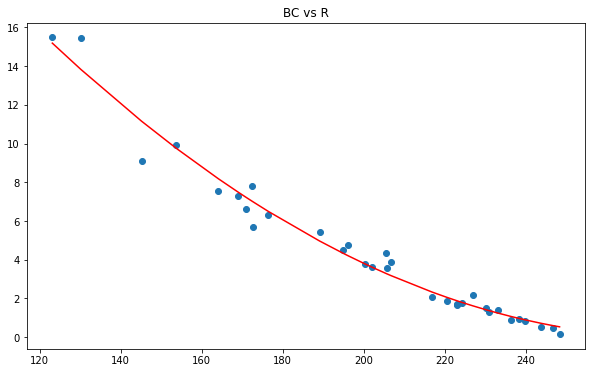

In [31]:
%matplotlib inline

plt.figure(figsize=(10,6))
plt.title("BC vs R")
plt.scatter(X_train_after_cc.iloc[:, 0].values, y_train_after_cc)
plt.plot(df_plot["R_corrected"], df_plot["BC_Pred"], c="red")
plt.show()

In [35]:
r2, mae, mse = r2_score(y_train_after_cc, y_pred), mean_absolute_error(y_train_after_cc, y_pred), mean_squared_error(y_train_after_cc, y_pred)
print("\nTrain Scores:")
print(f"R2 = {r2} \nMAE = {mae} \nRMSE = {np.sqrt(mse)}\n")


Test Scores:
R2 = 0.9730371952076267 
MAE = 0.42330028423463617 
RMSE = 0.6335864274439743



In [36]:
y_test_pred = poly_reg_model.predict(poly_test_features)
r2, mae, mse = r2_score(y_test_after_cc, y_test_pred), mean_absolute_error(y_test_after_cc, y_test_pred), mean_squared_error(y_test_after_cc, y_test_pred)
print("\nTest Scores:")
print(f"R2 = {r2} \nMAE = {mae} \nRMSE = {np.sqrt(mse)}\n")


Test Scores:
R2 = 0.8829198177983427 
MAE = 0.7285859691512834 
RMSE = 0.9433025223977203



In [37]:
plot_data = pd.DataFrame({
    'R2': [0.88, 0.91, 0.92, 0.90, 0.84, 0.84, 0.89],
    'MAE': [0.73, 0.63, 0.61, 0.71, 0.91, 0.91, 0.76],
    'RMSE': [0.94, 0.84, 0.75, 0.86, 1.10, 1.10, 0.93],
    'labels': ['Polynomial', 'Ensemble', 'GB', 'RF', 'LR', 'Ridge', 'SVM']
})

plot_data

R2   MAE  RMSE      labels
0  0.88  0.73  0.94  Polynomial
1  0.91  0.63  0.84    Ensemble
2  0.92  0.61  0.75          GB
3  0.90  0.71  0.86          RF
4  0.84  0.91  1.10          LR
5  0.84  0.91  1.10       Ridge
6  0.89  0.76  0.93         SVM